In [117]:
import pandas as pd
import numpy as np
import statsmodels as sts
import matplotlib.pyplot as plt
import seaborn as sns
import os


# Initializing Movie Metadata

In [118]:
def initialize_metadata():
    rpath = './Data/movie.metadata.tsv'
    
    df_metadata = pd.read_csv(rpath, 
        sep='\t', 
        header=None,
        names=['movie_wikipedia_id', 'movie_freebase_id', 'movie_name',
        'release_date', 'revenue', 'runtime', 'languages', 'countries', 'genres'])
    
    # Transform release_date to get release_year
    df_metadata['release_date'] = df_metadata['release_date'].astype(str).str.slice(0, 4)
    df_metadata = df_metadata.rename(columns={'release_date': 'release_year'})
    
    # Standardize nan-values
    values_to_replace = ['{}', '[]', '', 'NA', 'N/A', '-', 'nan']
    replace_map = {value: np.nan for value in values_to_replace}
    processed_metadata = df_metadata.replace(replace_map)
    
    return processed_metadata

In [119]:
metadata_df = initialize_metadata()

metadata_df

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science..."
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp..."
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D..."
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic..."
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}"
...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}"
81737,34980460,/m/0g4pl34,Knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0..."
81738,9971909,/m/02pygw1,Another Nice Mess,1972,NaN,66.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06nbt"": ""Satire"", ""/m/01z4y"": ""Comedy""}"
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ..."


**Comment:** we can see that the dataframe consists of metadata for 81 741 movies, which is much larger than the 40 000 movie plot summaries. This means we probably have meta data for a lot of movies that we're missing plot summaries for

In [120]:
metadata_df[metadata_df['release_year'].isna()].reset_index(drop=True)

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres
0,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""..."
1,31137877,/m/0gh7n22,Boadicea,NaN,NaN,NaN,NaN,NaN,"{""/m/07s9rl0"": ""Drama"", ""/m/03hn0"": ""Historica..."
2,27374355,/m/0by1_ff,Les Indiens sont encore loin,NaN,NaN,95.0,NaN,"{""/m/0f8l9c"": ""France"", ""/m/06mzp"": ""Switzerla...","{""/m/07s9rl0"": ""Drama""}"
3,29766415,/m/0fp_syp,Donald's Crime,NaN,NaN,NaN,NaN,NaN,"{""/m/02hmvc"": ""Short Film""}"
4,28415406,/m/0crj1f3,The Last Trackers of the Outback,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/0f8l9c"": ""France"", ""/m/0chghy"": ""Australia""}","{""/m/0jtdp"": ""Documentary""}"
...,...,...,...,...,...,...,...,...,...
6897,35758766,/m/0gksk60,Love Torn in Dream,NaN,NaN,123.0,NaN,"{""/m/0f8l9c"": ""France"", ""/m/01p1v"": ""Chile"", ""...","{""/m/01hmnh"": ""Fantasy"", ""/m/07s9rl0"": ""Drama""}"
6898,26219108,/m/0b76gfr,The Leopard Woman,NaN,NaN,70.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/06ppq"": ""Silent film"", ""/m/02l7c8"": ""Roma..."
6899,31422084,/m/0gk_vxb,Zone 39,NaN,NaN,95.0,NaN,NaN,"{""/m/06n90"": ""Science Fiction""}"
6900,29449643,/m/0ds22f6,Muthukku Muthaaga,NaN,NaN,147.0,NaN,NaN,"{""/m/05p553"": ""Comedy film""}"


**Comment:** checking for missing values on 'release_year', it turns out about 6900 movie plots are missing release years. If it later turns out many of these movies have movie plots present in the dataset, we might consider scraping or other strategies to retrieve missing data. However, if the plot summary is also missing, we can disregard these movies.

# Handling Plot Summaries

In [121]:
!pip install langdetect

In [122]:
from textblob import TextBlob
import nltk
from concurrent.futures import ThreadPoolExecutor, as_completed
from langdetect import DetectorFactory, detect

DetectorFactory.seed = 0

In [123]:
def initialize_plot_summaries():
    rpath = './Data/plot_summaries.txt'
    
    # Create df
    df_summaries = pd.read_csv(rpath, 
        sep='\t', 
        header=None, 
        names=['movie_wikipedia_id', 'plot_summary'])
    
    # Converting df into list of dictionaries
    records = df_summaries.to_dict(orient='records')
    
    results = []
    failed = 0
    
    # Function to derive metrics for movie plot record
    def process_plot_summary(record):        
        try:
            plot_summary = record['plot_summary']
            language = detect(plot_summary)
            word_count = len(plot_summary.split())
            char_count = len(plot_summary)
            avg_word_length = word_count / char_count if char_count else 0
            sentence_count = len(nltk.sent_tokenize(plot_summary))
            lexical_diversity = len(set(plot_summary.split())) / word_count if word_count else 0
            sentiment_polarity = TextBlob(plot_summary).sentiment.polarity

            return {
                "movie_wikipedia_id": record['movie_wikipedia_id'],
                "plot_summary": plot_summary,
                "language": language,
                "word_count": word_count,
                "char_count": char_count,
                "avg_word_length": avg_word_length,
                "sentence_count": sentence_count,
                "lexical_diversity": lexical_diversity,
                "sentiment_polarity": sentiment_polarity
            }
            
        except Exception as e:
            print(f"An exception occurred: {e}")
            return None

    # Multithreading to speed up process
    with ThreadPoolExecutor(max_workers=12) as executor:
        future_to_record = {executor.submit(process_plot_summary, record): record for record in records}

        for future in as_completed(future_to_record):
            result = future.result()
            if result is not None:
                results.append(result)
            else:
                failed += 1
    
    # Create new df from results
    processed_summaries = pd.DataFrame(results)
    
    return processed_summaries

In [124]:
plot_summaries = initialize_plot_summaries()

In [125]:
language_plots = plot_summaries.groupby('language').size().reset_index(name='count').sort_values(by='count', ascending=False)

language_plots

,language,count
1,en,42276
4,id,13
2,es,7
0,de,4
5,sw,2
3,hi,1


In [126]:
plot_summaries[plot_summaries['language'] != 'en'][['language', 'plot_summary']].reset_index(drop=True).head(10)

,language,plot_summary
0,es,* China Zorrilla ... Mamá * Eduardo Blanco .....
1,es,--> *Conchita Montes ... Mercedes *Rafael Dur...
2,id,Love story of Premadasa and Mallika. Cast * as...
3,es,"* ""Teddy Atkins"" Josh Hutcherson * ""El Yuma"" ..."
4,id,"{| class""50%"" |- bgcolor=""#CCCCCC"" ! Actor !!..."
5,id,* Ashok Kumar * Nalini Jaywant * Pran * Durga...
6,de,--&#62; *Peter Haber as Martin Beck *Mikael P...
7,sw,"{| class=""wikitable"" |- !Character !Voice act..."
8,hi,"Kalu is a taxi-driver in Mumbai, India. He has..."
9,de,--&#62; *Peter Haber as Martin Beck *Mikael P...


**Comment:** by only preserving english plot summaries, we're not losing more than a few datapoints, while simplifying a bit of the NLP processing. It also appears that something has went wrong in the retrieval of these plots, making them "safe" to remove

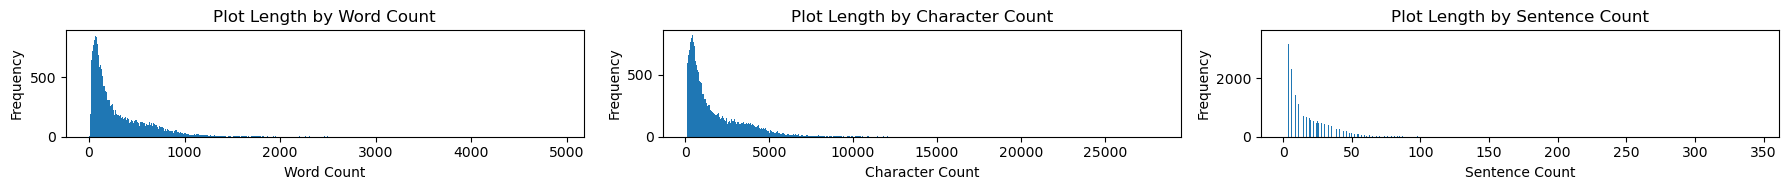

In [127]:
removed_non_english = plot_summaries[plot_summaries['language'] == 'en']

summary_lengths = removed_non_english[['word_count', 'char_count', 'sentence_count']]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 2))

# Histogram for word count on left subplot
axes[0].hist(summary_lengths['word_count'], bins=1000)
axes[0].set_title('Plot Length by Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Histogram for character count on middle subplot
axes[1].hist(summary_lengths['char_count'], bins=1000)
axes[1].set_title('Plot Length by Character Count')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

# Histogram for sentrence count count on right subplot
axes[2].hist(summary_lengths['sentence_count'], bins=1000)
axes[2].set_title('Plot Length by Sentence Count')
axes[2].set_xlabel('Sentence Count')
axes[2].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()

**Comment:** by the plot, we can observe that we have heavy tailed distributions for both plot summary 'word_count' and 'character_count'. The two features are intuitively dependent (more words, generally equals more characters), so if one is heavy-tailed, we would generally asumme both are

In [128]:
shortest_plot = removed_non_english.sort_values(by='word_count', ascending=True)['plot_summary'].iloc[0]
longest_plot = removed_non_english.sort_values(by='word_count', ascending=False)['plot_summary'].iloc[0]

print(f'shortest plot:\n{shortest_plot}\n')
print(f'longest plot:\n{longest_plot}\n')

shortest plot:
<ref namehttp://www2u.biglobe.ne.jp/~p-g/data/2007/071112/osyo.htm|title2010-06-22|languageP.G. Web Site}}

longest plot:
 The Big Beginning starts with Timmy wishing he was in his own movie trilogy . In the first movie, he is chased by Crocker while they both have special powers. Then, he wishes he had a second movie, where he simply throws a ring into a volcano. In the third movie, he becomes "Timmy Totter" playing "Poofer Scoop" as he chases Poof around, until Vicky appears as "Moldy Wart" and chases him, which is then interrupted by Jorgen. He zaps away Timmy's fairies, before cryptically warning him to stick to the shadows and not to speak his name. Timmy then falls from the sky and lands in front of his house. Timmy claims was just like any one of his other normal mornings and walks inside his house. However, his parents don't seem to know who he is, thinking him a street urchin. When Timmy goes to school, everyone thinks that he's a new kid. Growing more and more 

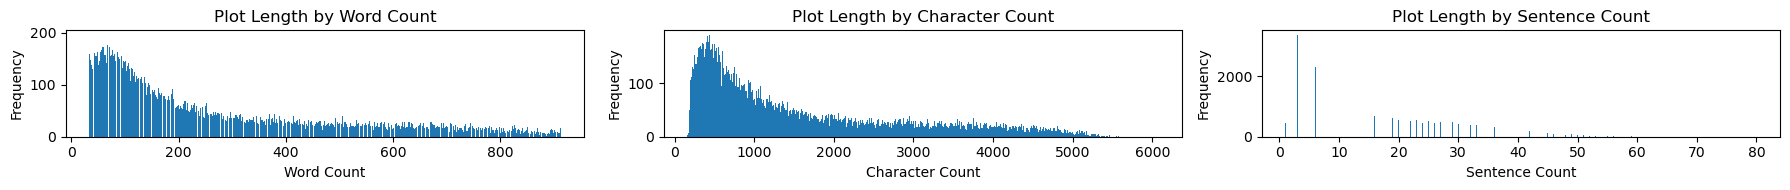

In [129]:
# Lower & upper percentiles
lower_percentile = 0.05
upper_percentile = 0.95

# Calculate the actual bounds for filtering
lower_word_bound = summary_lengths['word_count'].quantile(lower_percentile)
upper_word_bound = summary_lengths['word_count'].quantile(upper_percentile)

# Filter df on calculated percentiles
filtered_summary_lengths = summary_lengths[
    (summary_lengths['word_count'] >= lower_word_bound) & 
    (summary_lengths['word_count'] <= upper_word_bound)
]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 2))

# Histogram for word count on left subplot
axes[0].hist(filtered_summary_lengths['word_count'], bins=1000)
axes[0].set_title('Plot Length by Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')

# Histogram for character count on right subplot
axes[1].hist(filtered_summary_lengths['char_count'], bins=1000)
axes[1].set_title('Plot Length by Character Count')
axes[1].set_xlabel('Character Count')
axes[1].set_ylabel('Frequency')

# Histogram for character count on right subplot
axes[2].hist(filtered_summary_lengths['sentence_count'], bins=1000)
axes[2].set_title('Plot Length by Sentence Count')
axes[2].set_xlabel('Sentence Count')
axes[2].set_ylabel('Frequency')

# Display the plot
plt.tight_layout()
plt.show()


**Comment:** through quantile removal, we have effectively removed the 5% shortest and longest movie plot summaries. The distribution is heavy-tailed

In [130]:
filtered_movie_summaries = removed_non_english[(removed_non_english['word_count'] >= lower_word_bound) & 
                                               (removed_non_english['word_count'] <= upper_word_bound)]

filtered_movie_summaries.sort_values(by='word_count', ascending=True)['plot_summary'].to_csv('plots.csv')

In [131]:
def process_plot_summaries(df, keep_languages, lower_percentile, upper_percentile):
    # Language filter
    df = df[df['language'].isin(keep_languages)]
    
    lower_word_bound = df['word_count'].quantile(lower_percentile)
    upper_word_bound = df['word_count'].quantile(upper_percentile)
    df = df[(df['word_count'] >= lower_word_bound) & (df['word_count'] <= upper_word_bound)]
    
    return df


keep_languages = ['en']
lower_percentile = 0.05
upper_percentile = 0.95

processed_plots_df = process_plot_summaries(plot_summaries, keep_languages, lower_percentile, upper_percentile).reset_index(drop=True)

processed_plots_df

,movie_wikipedia_id,plot_summary,language,word_count,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity
0,2497380,"Fallen Art presents the story of General A, a ...",en,59,359,0.164345,2,0.779661,-0.025926
1,309159,The movie is about an assassination attempt on...,en,112,667,0.167916,8,0.758929,-0.079365
2,35004945,"Today, the formerly-desertic region of Almeria...",en,139,872,0.159404,6,0.741007,0.054762
3,179044,"The film begins with Navin R. Johnson , a home...",en,691,3908,0.176817,30,0.583213,0.065822
4,25011242,Joe Davis Sr. owns a big nightclub called the ...,en,140,752,0.186170,7,0.650000,0.179167
...,...,...,...,...,...,...,...,...,...
38092,4913923,"In Northern Norway during the 1860s, a little ...",en,642,3640,0.176374,36,0.514019,-0.000852
38093,35102018,American Luthier focuses on Randy Parsons’ tra...,en,160,871,0.183697,6,0.700000,0.156000
38094,1096473,"In 1928 Hollywood, director Leo Andreyev look...",en,524,2971,0.176372,31,0.568702,0.155081
38095,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",en,230,1289,0.178433,10,0.617391,0.104762


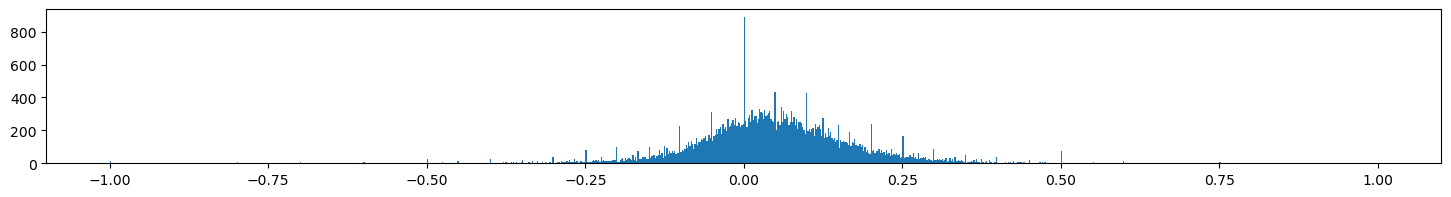

In [135]:
fig, axes = plt.subplots(figsize=(18,2))
axes.hist(processed_plots_df['sentiment_polarity'], bins=1000)
plt.show()

**Comment:** Sentiment polarity is a measure of the emotional tone of text, quantifying it into a numerical score that represents the positivity or negativity of the text. A sentiment polarity score close to zero therefore represents neutral language. As high sentiment polarity scores reflects more emotionally charged language, it can also be interpreted as a measurement of subjectivity. For plot summaries, we might prefer to work with factually correct/descriptive plot summaries so that our features are less prone to subjectivity bias that can skew our later results in topic modelling, theme-analysis, etc.

In [138]:
most_negative = processed_plots_df.sort_values(by='sentiment_polarity', ascending=True)['plot_summary'].iloc[0]
most_positive = processed_plots_df.sort_values(by='sentiment_polarity', ascending=False)['plot_summary'].iloc[0]

print(f'most negative plot:\n{most_negative}\n')
print(f'most positive plot:\n{most_positive}\n')

most negative plot:
10 schoolgirls have to remain in their classroom and wait for the policemen to arrive and interrogate them, since they all are suspects of something terrible that had just happened at school. As they wait, the memories and feelings of each girl are explored.

most positive plot:
Two Texas Rangers investigate the kidnapping of wives and daughters of Senators. In order to do so, one goes undercover as "The Scarlet Horseman", a legendary and respected Comanche figure. The villainess, Matosca, intends to use the kidnappees to force a partition of Texas.



**Comment:** At first glance, it appears that the plots with high positive or negative sentiment polarity score are quite short. This may be due to the score being heavily affected by a few emotionally charged words such as "terrible" and "legendary", "respected". We should investigate further if there is a correlation between absolute sentiment polarity score and plot length

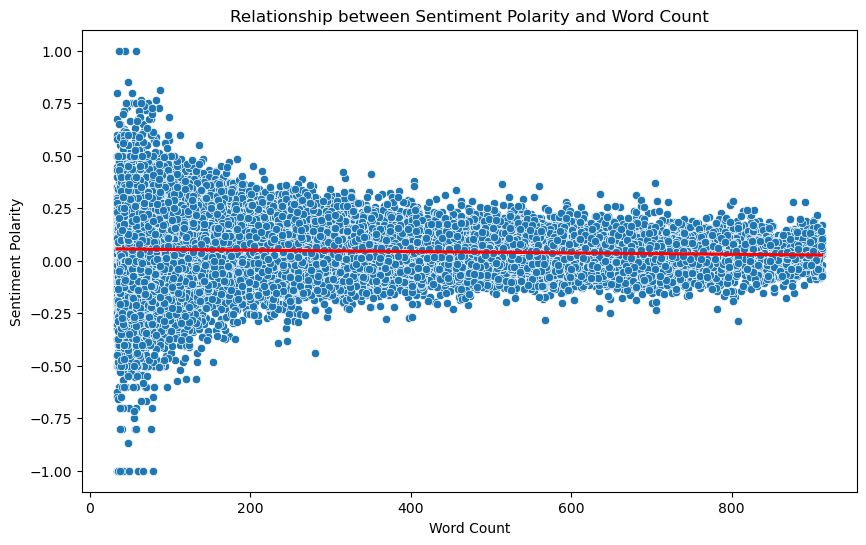

In [151]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='word_count', y='sentiment_polarity', data=processed_plots_df)
sns.regplot(x='word_count', y='sentiment_polarity', data=processed_plots_df, scatter=False, color='red')
plt.title('Relationship between Sentiment Polarity and Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Polarity')
plt.show()


**Comment:** From the scatterplot, the regression line seem to be close to constant, indicating slope coefficient close to zero meaning that sentiment polarity and word count is not very correlated. However, one can clearly observe heteroskedasticity as the variance appears to decrease for higher word counts.

In [152]:
import statsmodels.formula.api as smf

mod = smf.ols(formula='sentiment_polarity ~ word_count', data=processed_plots_df)
res = mod.fit()
print(res.summary())

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
                            OLS Regression Results                            
Dep. Variable:     sentiment_polarity   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     125.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):           5.76e-29
Time:                        19:42:45   Log-Likelihood:                 23301.
No. Observations:               38097   AIC:                        -4.660e+04
Df Residuals:                   38095   BIC:                        -4.658e+04
Df Model:                           1                                         
Covariance Type:            nonrobust  

**Comment:** Our OLS regression results indicate a slightly negative correlation, meaning that if word_count increases, sentiment_polarity decreases. A P-value of 0.000 indicates that this is statistically significant. However, a R-squared value of 0.003 indicates that the regression model is unable to capture the variance

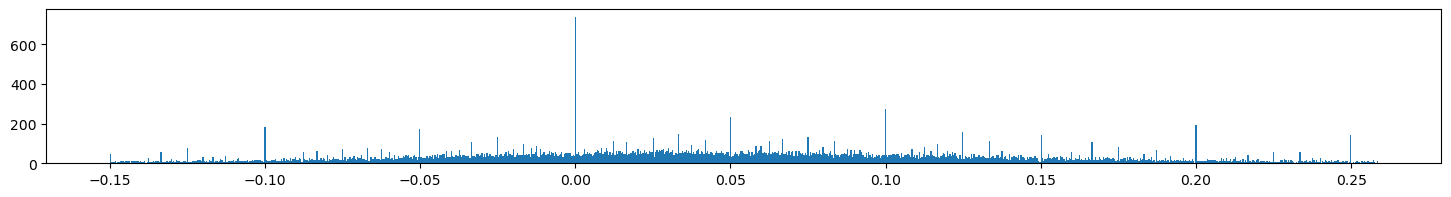

In [157]:
lower_sentiment_bound = processed_plots_df['sentiment_polarity'].quantile(lower_percentile)
upper_sentiment_bound = processed_plots_df['sentiment_polarity'].quantile(upper_percentile)

filtered_sentiment_df = processed_plots_df[(processed_plots_df['sentiment_polarity'] >= lower_sentiment_bound) & (processed_plots_df['sentiment_polarity'] <= upper_sentiment_bound)]

fig, axes = plt.subplots(figsize=(18,2))
axes.hist(filtered_sentiment_df['sentiment_polarity'], bins=1000)
plt.show()

In [159]:
def process_plot_summaries(df, keep_languages, lower_quantile, upper_quantile):
    # Language filter
    df = df[df['language'].isin(keep_languages)]
    
    # Word_count quantile filtering
    lower_word_bound = df['word_count'].quantile(lower_quantile)
    upper_word_bound = df['word_count'].quantile(upper_quantile)
    df = df[(df['word_count'] >= lower_word_bound) & (df['word_count'] <= upper_word_bound)]
    
    # Sentiment_polarity quantile filtering
    lower_word_bound = df['sentiment_polarity'].quantile(lower_quantile)
    upper_word_bound = df['sentiment_polarity'].quantile(upper_quantile)
    df = df[(df['sentiment_polarity'] >= lower_word_bound) & (df['sentiment_polarity'] <= upper_word_bound)]
    
    return df

processed_plots_df = process_plot_summaries(plot_summaries, keep_languages, lower_percentile, upper_percentile).reset_index(drop=True)

processed_plots_df

,movie_wikipedia_id,plot_summary,language,word_count,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity
0,2497380,"Fallen Art presents the story of General A, a ...",en,59,359,0.164345,2,0.779661,-0.025926
1,309159,The movie is about an assassination attempt on...,en,112,667,0.167916,8,0.758929,-0.079365
2,35004945,"Today, the formerly-desertic region of Almeria...",en,139,872,0.159404,6,0.741007,0.054762
3,179044,"The film begins with Navin R. Johnson , a home...",en,691,3908,0.176817,30,0.583213,0.065822
4,25011242,Joe Davis Sr. owns a big nightclub called the ...,en,140,752,0.186170,7,0.650000,0.179167
...,...,...,...,...,...,...,...,...,...
34296,4913923,"In Northern Norway during the 1860s, a little ...",en,642,3640,0.176374,36,0.514019,-0.000852
34297,35102018,American Luthier focuses on Randy Parsons’ tra...,en,160,871,0.183697,6,0.700000,0.156000
34298,1096473,"In 1928 Hollywood, director Leo Andreyev look...",en,524,2971,0.176372,31,0.568702,0.155081
34299,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",en,230,1289,0.178433,10,0.617391,0.104762


# Merging Movie Metadata & Processed Plot Summaries

In [160]:
merged_df = pd.merge(left=metadata_df, right=processed_plots_df, how='inner', on='movie_wikipedia_id')

merged_df[merged_df['release_year'].isna()]

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres,plot_summary,language,word_count,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity
7,11250635,/m/02r52hc,The Mechanical Monsters,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06n90"": ""Science Fiction"", ""/m/03k9fj"": ""...",The story starts as one of the robots flies i...,en,618,3456,0.178819,26,0.500000,0.068308
38,29766415,/m/0fp_syp,Donald's Crime,NaN,NaN,NaN,NaN,NaN,"{""/m/02hmvc"": ""Short Film""}",One evening while eagerly awaiting a date with...,en,277,1543,0.179520,22,0.660650,0.046250
56,11717027,/m/02rpz18,Is There a Doctor in the Mouse?,NaN,NaN,NaN,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/0hqxf"": ""Family Film"", ""/m/01z4y"": ""Comedy""}",{{Plot}} Jerry is mixing a potion. When he dri...,en,579,2993,0.193451,36,0.471503,0.089425
57,10628777,/m/02qkn7c,Peddarayudu,NaN,NaN,NaN,"{""/m/09s02"": ""Telugu language""}","{""/m/03rk0"": ""India""}","{""/m/07s9rl0"": ""Drama""}","Pedarayudu is a very kind-hearted, discipline...",en,348,2047,0.170005,19,0.554598,-0.012821
62,18902861,/m/04jfr7g,14 Going on 30,NaN,NaN,94.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02l7c8"": ""Romance Film"", ""/m/0hj3n2s"": ""F...",14-year-old Danny O'Neil is madly in love wit...,en,463,2658,0.174191,22,0.548596,0.141730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34127,21566359,/m/05h4c_g,The Haunted House of Horror,NaN,NaN,92.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/03npn"": ""Horror""}","In swinging London, a group of twenty-somethin...",en,425,2486,0.170957,19,0.574118,-0.118519
34145,13959113,/m/03cpft4,"Women... Oh, Women!",NaN,NaN,80.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/04k2v3"": ""Pinku eiga"", ""/m/0gw5n2f"": ""Jap...","Women... Oh, Women! is a sex-documentary focus...",en,59,371,0.159030,4,0.762712,0.055556
34172,25867209,/m/09v324z,Kisaragi,NaN,NaN,108.0,NaN,NaN,"{""/m/02n4kr"": ""Mystery"", ""/m/05p553"": ""Comedy ...",One year after the suicide of C-list model Kis...,en,59,316,0.186709,3,0.762712,0.233333
34175,31887671,/m/0gvs423,Mother Fish,NaN,NaN,92.0,"{""/m/07zrf"": ""Vietnamese Language""}",NaN,"{""/m/07s9rl0"": ""Drama""}",Mother Fish follows the story of a middle-aged...,en,116,670,0.173134,6,0.689655,0.128571


**Comment:** After merging the processed plot summaries on movie metadata, we're lefte with 2359 movies without release_year

In [162]:
filtered_df = merged_df.copy()
filtered_df = filtered_df[~filtered_df['release_year'].isna()]

### Movies per Year

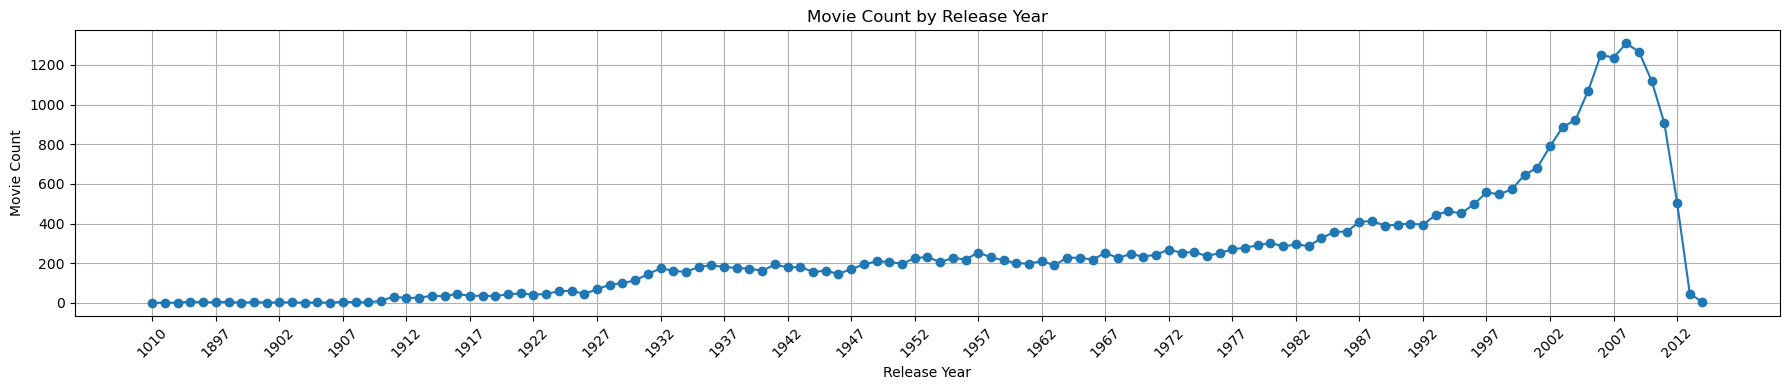

In [174]:
grouped_year = filtered_df.groupby('release_year').size().reset_index(name='count')

# Plotting the line chart
plt.figure(figsize=(18, 4))
plt.plot(grouped_year['release_year'], grouped_year['count'], marker='o', linestyle='-')
plt.title('Movie Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')

# Set xticks to show every fifth year
xticks = grouped_year['release_year'].iloc[::5]
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

In [180]:
grouped_year = grouped_year.sort_values(by='release_year', ascending=False).reset_index(drop=True)

grouped_year['running_total'] = grouped_year['count'].cumsum()

# Calculate the total movie count for percentage calculation
total_movie_count = grouped_year['count'].sum()

# Calculate the percentage of the total for each year
grouped_year['percentage_captured'] = (grouped_year['running_total'] / total_movie_count) * 100

grouped_year

,release_year,count,running_total,percentage_captured
0,2014,4,4,0.012434
1,2013,47,51,0.158528
2,2012,506,557,1.731373
3,2011,906,1463,4.547574
4,2010,1119,2582,8.025862
...,...,...,...,...
118,1896,4,32161,99.968916
119,1895,7,32168,99.990675
120,1894,1,32169,99.993783
121,1893,1,32170,99.996892


**Comment:** keeping years between 1960 and 2012, we preserve about 80% of the movies of the dataset, while still 

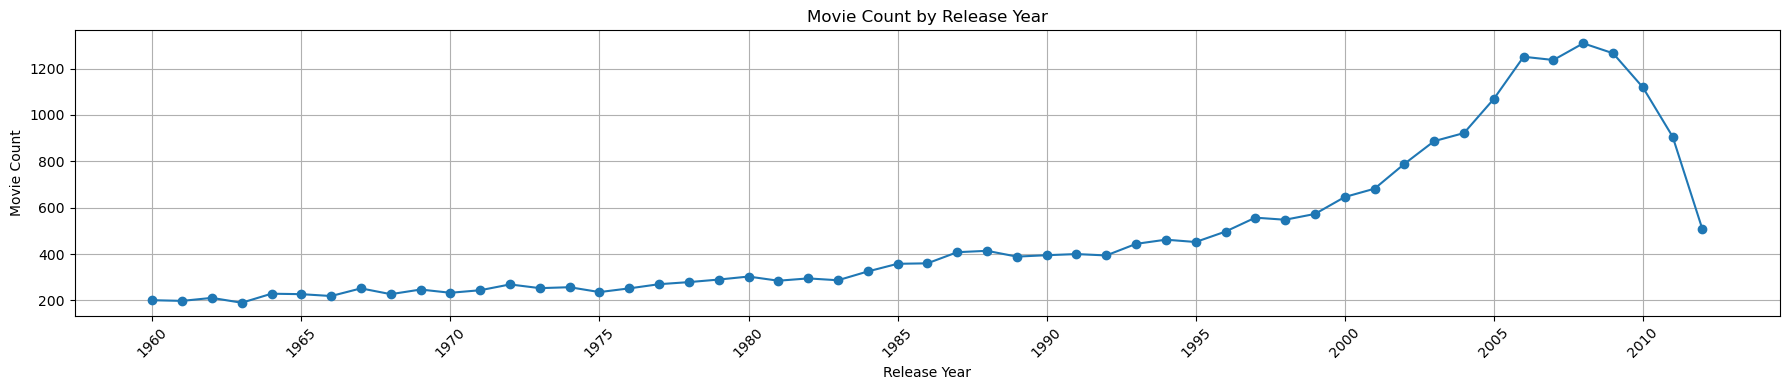

In [189]:
year_filtered = grouped_year[(grouped_year['release_year'].astype(int) <= 2012) & (grouped_year['percentage_captured'] <= 80)][['release_year', 'count']].sort_values(by='release_year', ascending=True).reset_index(drop=True)

# Plotting the line chart
plt.figure(figsize=(18, 4))
plt.plot(year_filtered['release_year'], year_filtered['count'], marker='o', linestyle='-')
plt.title('Movie Count by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Movie Count')

# Set xticks to show every fifth year
xticks = year_filtered['release_year'].iloc[::5]
plt.xticks(ticks=xticks, labels=xticks, rotation=45)

plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the labels
plt.show()

In [191]:
filtered_df = filtered_df[(filtered_df['release_year'].astype(int) >= 1960) & (filtered_df['release_year'].astype(int) >= 1960)]

filtered_df

,movie_wikipedia_id,movie_freebase_id,movie_name,release_year,revenue,runtime,languages,countries,genres,plot_summary,language,word_count,char_count,avg_word_length,sentence_count,lexical_diversity,sentiment_polarity
0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...","Set in the second half of the 22nd century, th...",en,357,2181,0.163686,15,0.627451,-0.085095
1,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",A series of murders of rich young women throug...,en,590,3301,0.178734,36,0.542373,0.035867
2,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}","Eva, an upper class housewife, becomes frustra...",en,426,2339,0.182129,24,0.582160,0.133259
3,18998739,/m/04jcqvw,The Sorcerer's Apprentice,2002,NaN,86.0,"{""/m/02h40lc"": ""English Language""}","{""/m/0hzlz"": ""South Africa""}","{""/m/0hqxf"": ""Family Film"", ""/m/01hmnh"": ""Fant...","Every hundred years, the evil Morgana returns...",en,163,870,0.187356,7,0.631902,0.040568
4,6631279,/m/0gffwj,Little city,1997,NaN,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...","Adam, a San Francisco-based artist who works a...",en,225,1234,0.182334,9,0.626667,0.165202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34221,26482675,/m/0bbwngb,Eşrefpaşalılar,2010,1847671.0,NaN,NaN,NaN,"{""/m/05p553"": ""Comedy film"", ""/m/07s9rl0"": ""Dr...","The film is about two friends, Tayyar , a mafi...",en,108,601,0.179700,4,0.731481,0.258333
34222,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011,NaN,120.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/07s9rl0"": ""Drama""}",Two former National Oceanic Atmospheric Admini...,en,104,664,0.156627,5,0.759615,0.108333
34223,34980460,/m/0g4pl34,Knuckle,2011,NaN,96.0,"{""/m/02h40lc"": ""English Language""}","{""/m/03rt9"": ""Ireland"", ""/m/07ssc"": ""United Ki...","{""/m/03bxz7"": ""Biographical film"", ""/m/07s9rl0...",{{No plot}} This film follows 12 years in the ...,en,64,368,0.173913,3,0.781250,0.010000
34224,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992,NaN,150.0,"{""/m/03_9r"": ""Japanese Language""}","{""/m/03_3d"": ""Japan""}","{""/m/06n90"": ""Science Fiction"", ""/m/0gw5n2f"": ...","The story takes place in the year 2092,The Sup...",en,199,1237,0.160873,8,0.713568,0.194003
